In [35]:
import pickle
import pandas as pd
import glob
import numpy as np

In [36]:
haha = {}

files = [f for f in glob.iglob('*LR*p')]

In [37]:
for file in files:
    haha[file[:-2]] = pickle.load(open(file,'rb'))

In [38]:
files

['fixed_mm10_lncRNAunspliced_4_200win_20slide_2LRcutoff_MARKOV.p',
 'fixed_mm10_pcspliced_4_200win_20slide_2LRcutoff_MARKOV.p',
 'interAssociatedGenesT100_4_200win_20slide_2LRcutoff_MARKOV.p',
 'fixed_mm10_pctranscripts_4_200win_20slide_2LRcutoff_MARKOV.p',
 'interAssociatedGenesB100_4_200win_20slide_2LRcutoff_MARKOV.p',
 'fixed_mm10_lncRNAspliced_4_200win_20slide_2LRcutoff_MARKOV.p']

In [39]:
dfImport = pd.DataFrame.from_dict(haha)

In [48]:
agg = {}
for col in dfImport.columns:
    l = []
    for val in dfImport[col].values:
        if isinstance(val,list):
            l.append(val[1])
        else:
            l.append(np.nan)
    agg[col] = l

In [49]:
df = pd.DataFrame.from_dict(agg,orient='index')
df = df.T

In [50]:
df.columns

Index(['fixed_mm10_lncRNAunspliced_4_200win_20slide_2LRcutoff_MARKOV',
       'fixed_mm10_pcspliced_4_200win_20slide_2LRcutoff_MARKOV',
       'interAssociatedGenesT100_4_200win_20slide_2LRcutoff_MARKOV',
       'fixed_mm10_pctranscripts_4_200win_20slide_2LRcutoff_MARKOV',
       'interAssociatedGenesB100_4_200win_20slide_2LRcutoff_MARKOV',
       'fixed_mm10_lncRNAspliced_4_200win_20slide_2LRcutoff_MARKOV'],
      dtype='object')

In [51]:
df.columns = ['lncU','PCS','interT100','PCU','interB100','lncS']
df = df[['lncS','lncU','PCS','PCU','interB100','interT100']]

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

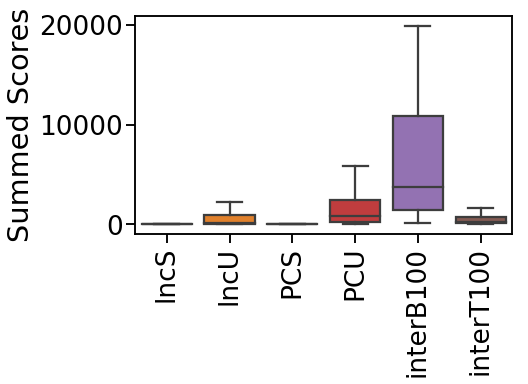

In [53]:
sns.set_context('talk',font_scale=1.6)
plt.figure(figsize=(8,6))
sns.boxplot(data=df,showfliers=False)
plt.xticks(rotation=90)
plt.ylabel('Summed Scores')
plt.tight_layout()
plt.savefig('./4mer_100w20s_markov_2LR_sumScore.pdf',bbox_inches='tight')

In [34]:
import numpy as np

In [35]:
agg = np.load('/Users/danielsprague/Documents/Lab/03_07_2019/bmodel_2mers.mkv.npy')

In [36]:
agg

array([[0.18147689, 0.13608337, 0.31828729, 0.36415246],
       [0.26392149, 0.14748169, 0.36856543, 0.22003139],
       [0.24835453, 0.18032789, 0.55104952, 0.02026805],
       [0.20656204, 0.13156056, 0.36033327, 0.15868698]])

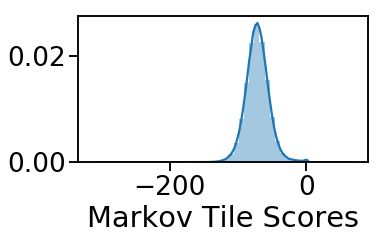

In [34]:
sns.set_context('talk',font_scale=1.6)
sns.distplot(haha[::100])
plt.xlabel('Markov Tile Scores')
plt.tight_layout()
plt.savefig('./distributionOfScores.pdf',bbox_inches='tight')

In [32]:
100-98.6

1.4000000000000057

In [49]:
df.index = dfImport.index

In [99]:
rankedPCU = df['PCU'].sort_values(ascending=False)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [101]:
rankedPCU = rankedPCU[~np.isnan(rankedPCU)]

In [56]:
import gtfparse

In [57]:
mouseGTF = gtfparse.read_gtf('/Users/danielsprague/Downloads/gencode.vM21.annotation.gtf')

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


In [64]:
genes = mouseGTF[mouseGTF['feature']=='gene']

In [75]:
geneIDs = genes[['gene_id','gene_name']]

In [115]:
geneIDs['gene_id'] = geneIDs['gene_id'].map(lambda x: x.split('.')[0])

/Users/danielsprague/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
geneMap  = dict(zip(geneIDs['gene_id'],geneIDs['gene_name']))

In [118]:
mappedData = {}
for k,v in rankedPCU.items():
    splitName = k.split('|')
    geneName = splitName[0][1:].split('.')[0]
    if geneName in geneMap.keys():
        mappedData[geneMap[geneName]] = v

In [120]:
mappedData['Srsf9']

5.874875303655657

In [126]:
mappedData

{'Tff2': 140.80049708107762,
 'Mbl2': 113.072723984039,
 'Lbx2': 110.86237379871103,
 'Tex13b': 86.88861806312823,
 'Mospd3': 85.10696956591251,
 'Zbp1': 75.98105197307004,
 '4930596D02Rik': 75.14308687121407,
 'Cks1b': 68.67385291118316,
 'Ascl3': 67.51625761424648,
 'Casd1': 67.4270571330198,
 'Pou1f1': 66.62968861883104,
 'Cyct': 63.91161801156955,
 'Fabp6': 63.00661613621374,
 'Klk7': 62.027812324774885,
 'Nsf': 61.2478890897824,
 'Rtp4': 59.02650098040644,
 'Hyal6': 58.82840582045392,
 'Mgst1': 57.78058043411284,
 '4930583I09Rik': 57.402486630588754,
 'Lelp1': 55.98089706052564,
 'Cenpt': 55.330937671731995,
 'Rpl10a': 54.93936222104041,
 'Vps25': 39.39601123143149,
 'Clcn4': 52.5188362729884,
 'Aldh3b3': 52.060918690619616,
 'Defb3': 51.9270503296173,
 'S100a11': 51.772598174825596,
 'Pim1': 50.655863770900176,
 'Ccdc70': 50.56263106208851,
 'Tal2': 49.21471714148096,
 'Ctla2b': 49.12450935075064,
 'Calr3': 48.77689163727523,
 'Xkrx': 48.72925891986373,
 'Aqp7': 48.68615306221513